Data Splitting
- partitioning dataset into different subsets (ex. training, validation, and test sets)
- essential for training models, tuning parameters, and assessing performance
- train : test = 70 ~ 80 : 20 ~ 30

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv("./data/Fish.csv")
df = df[(df["Species"].isin(["Bream", "Smelt"]))][["Species", "Weight", "Length2"]]

In [10]:
le = LabelEncoder()
df["label"] = le.fit_transform(df["Species"])

In [11]:
df.head()

,Species,Weight,Length2,label
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


In [13]:
df.shape

(49, 4)

Sampling Bias
- when data used for training and evaluating machine learning models is systematically skewed or unrepresentative of the larger population it aims to predict
- in the above example, the first half is Bream and second half is Smelt -> might train model with only Bream and no Smelt which is a problem 

train_test_split()
- function that randomly mixes the data and then splits the data into training set and testing set
- random_state
    - a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it -> ensures that the same randomization is used each time you run the code, resulting in the same splits of the data.
- stratify 
    - used to keep the same proportions as the initial dataset


In [15]:
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "Weight"]], df[["label"]], test_size = 0.25, stratify = df[["label"]], random_state= 12)

In [16]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

36 13 36 13


In [17]:
y_test

,label
149,1
11,0
6,0
27,0
17,0
28,0
3,0
156,1
12,0
151,1


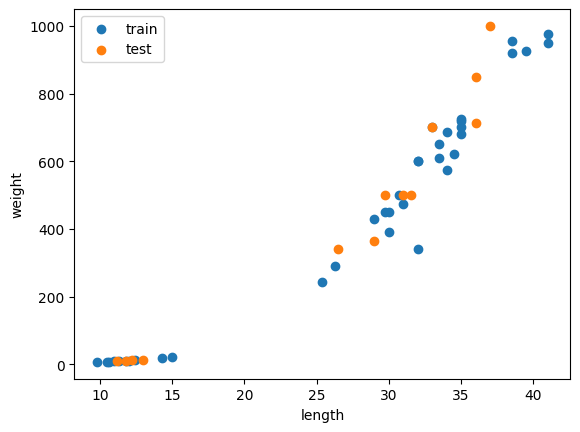

In [20]:
plt.figure()

plt.scatter(x_train["Length2"], x_train["Weight"], label = "train")
plt.scatter(x_test["Length2"], x_test["Weight"], label = "test")

plt.legend()
plt.xlabel("length")
plt.ylabel("weight")
plt.show()


Training the Model

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Model Accuracy

In [23]:
knn.score(x_test, y_test)

1.0

Model Optimization

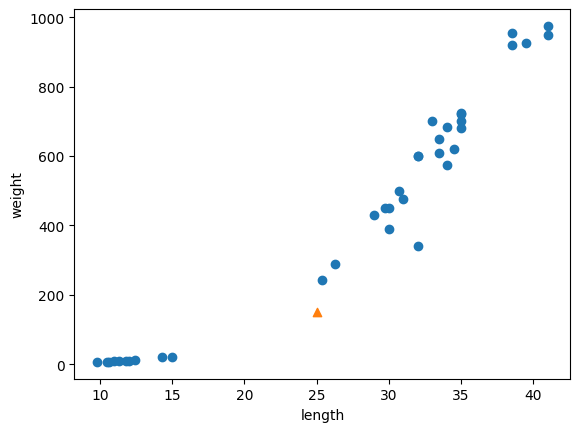

In [24]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:,1])
plt.scatter(25, 150, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [25]:
knn.predict([[25, 150]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

- kneighbors()
    - calculates distance between training data that is closest to test data 

In [26]:
dist, idx = knn.kneighbors([[25, 150]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


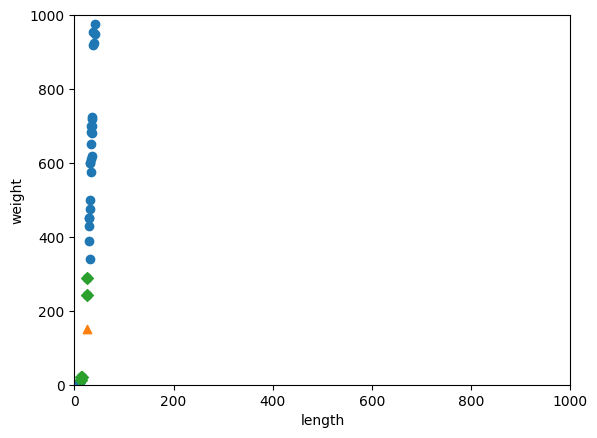

In [31]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:,1])
plt.scatter(25, 150, marker = "^")
plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker = "D")

plt.xlim((0, 1000))
plt.ylim((0, 1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [28]:
x_train.iloc[idx.flatten()]

,Length2,Weight
0,25.4,242.0
158,15.0,19.9
157,14.3,19.7
155,12.4,13.4
1,26.3,290.0


In [29]:
y_train.iloc[idx.flatten()]

,label
0,0
158,1
157,1
155,1
1,0


x-axis has small variance but y-axis has large variance so if there is small gap in y, it is calculated as a large distance 

- fish length is not being taken into account when predicting 
    - because weight and length have different units
- knn has a tendency where if distance between data is large, it has a great effect on the model 
    - if units of the independent variables are different, harder to accurately predict

- must scale the data -> standardize the independent variables

Feature Scaling
- transform the values of features or variables in a dataset to a similar scale

1) standard scaling 
    - values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation.
    - (X - mu) / stdev

In [32]:
ss = StandardScaler()

In [33]:
scaled_x_train = ss.fit_transform(x_train)

In [34]:
scaled_x_train

array([[-1.50516383, -1.36491254],
       [ 1.32209604,  1.53763938],
       [-1.21268867, -1.33373218],
       [-0.11103224, -0.49988909],
       [ 0.73714573,  0.70410501],
       [ 0.15219541, -0.06768608],
       [ 0.68839987,  0.51887515],
       [-1.65140141, -1.37201302],
       [ 0.24968713, -0.00594279],
       [ 1.07836674,  1.44502445],
       [ 0.44467057, -0.34553087],
       [ 0.34717885,  0.07123632],
       [ 0.44467057,  0.45713186],
       [ 0.59090815,  0.4880035 ],
       [ 0.73714573,  0.82759158],
       [-0.19877478, -0.64807298],
       [ 1.17585846,  1.46046028],
       [ 1.32209604,  1.61481849],
       [ 0.24968713, -0.19117265],
       [ 0.63965401,  0.71954083],
       [ 0.63965401,  0.37995275],
       [-1.64165224, -1.3735566 ],
       [-1.71964561, -1.37448275],
       [-1.52466217, -1.36460382],
       [ 1.07836674,  1.55307521],
       [ 0.22043961, -0.00594279],
       [-1.57340803, -1.36830842],
       [ 0.73714573,  0.84302741],
       [ 0.59090815,

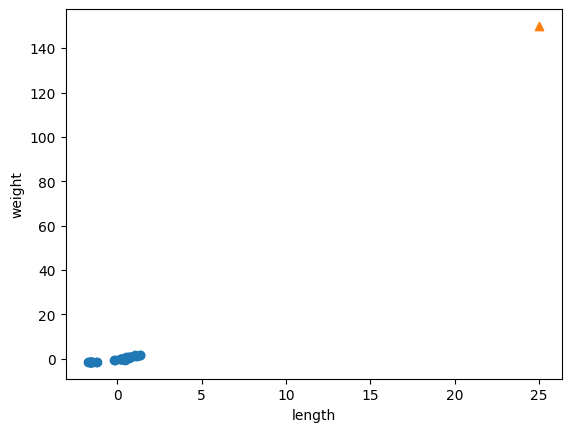

In [35]:
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(25, 150, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 25, 150 is unscaled data 

In [37]:
scaled_data = ss.transform([[25, 150]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


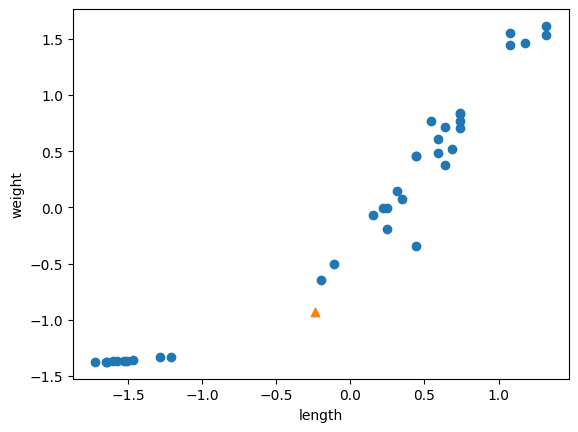

In [38]:
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [39]:
#retrain with scaled data

knn = KNeighborsClassifier(n_neighbors=5)

In [40]:
knn.fit(scaled_x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [41]:
# scaling test data 

scaled_x_test = ss.transform(x_test)

In [43]:
knn.score(scaled_x_test, y_test)

1.0

In [44]:
knn.predict(scaled_data)

array([0])

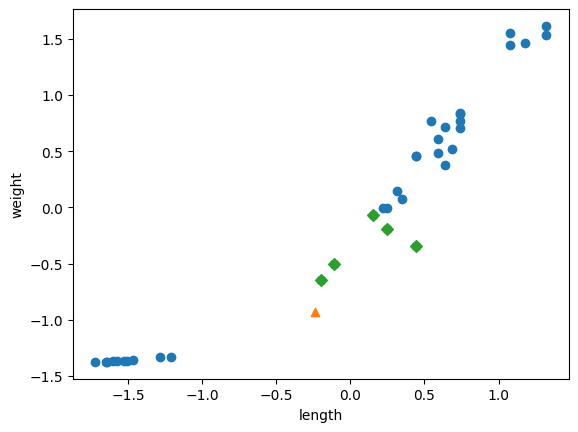

In [45]:
dist, idx = knn.kneighbors(scaled_data)
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker = "^")
plt.scatter(scaled_x_train[idx.flatten(), 0], scaled_x_train[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()
